In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns

In [3]:
merged_path = Path("merged_df.csv", encoding="utf-8")
merged_file_df = pd.read_csv(merged_path)
merged_file_df.head()

,Unnamed: 0,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors
0,0,ByteDance,$140,$225,225.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$127,$137,150.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$100,$66,66.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$95,$50,65.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,$40,$40,25.4,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
clean_df = merged_file_df.rename(columns={"2022_Valuation": "2022 Valuation",
                                       "2023_Valuation": "2023 Valuation",
                                       "2024_Valuation": "2024 Valuation"})
clean_df.head()

,Unnamed: 0,Company,2022 Valuation,2023 Valuation,2024 Valuation,Date Joined,Country,City,Industry,Select Investors
0,0,ByteDance,$140,$225,225.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$127,$137,150.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$100,$66,66.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$95,$50,65.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,$40,$40,25.4,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [5]:
clean_df.dtypes

Unnamed: 0            int64
Company              object
2022 Valuation       object
2023 Valuation       object
2024 Valuation      float64
Date Joined          object
Country              object
City                 object
Industry             object
Select Investors     object
dtype: object

In [6]:
clean_df['2022 Valuation'] = clean_df['2022 Valuation'].str.replace('$', '').str.replace(',', '').astype(float)
clean_df['2023 Valuation'] = clean_df['2023 Valuation'].str.replace('$', '').str.replace(',', '').astype(float)
clean_df.dtypes

Unnamed: 0            int64
Company              object
2022 Valuation      float64
2023 Valuation      float64
2024 Valuation      float64
Date Joined          object
Country              object
City                 object
Industry             object
Select Investors     object
dtype: object

# Growth

In [8]:
# Drop rows where valuation is NaN for years 2023 and 2024
active_df = clean_df.dropna(subset=["2023 Valuation", "2024 Valuation"], how='any')

# Optionally, you can reset index if needed
active_df = active_df.reset_index(drop=True)
active_df.count()

Unnamed: 0          1071
Company             1071
2022 Valuation      1071
2023 Valuation      1071
2024 Valuation      1071
Date Joined         1071
Country             1071
City                1071
Industry            1071
Select Investors    1054
dtype: int64

In [9]:
active_df["Growth from 2022 to 2024"] = active_df["2024 Valuation"] - active_df["2022 Valuation"]
active_df["Growth from 2022 to 2024"] = active_df["Growth from 2022 to 2024"].astype("int").pd.set_option('display.float_format', '{:.2f}'.format)

AttributeError: 'Series' object has no attribute 'pd'

In [14]:
new_growth_df = active_df.sort_values("Growth from 2022 to 2024", ascending=False).reset_index(drop=True)
new_growth_df.head()

,Unnamed: 0,Company,2022 Valuation,2023 Valuation,2024 Valuation,Date Joined,Country,City,Industry,Select Investors,Growth from 2022 to 2024
0,0,ByteDance,140.00,225.0,225.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",85.00
1,333,OpenAI,2.92,29.0,80.0,7/22/2019,United States,San Francisco,Artificial intelligence,Khosla Ventures,77.08
2,1,SpaceX,127.00,137.0,150.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",23.00
3,235,VAST Data,3.70,3.7,9.1,4/16/2020,United States,New York,Data management & analytics,"Norwest Venture Partners, Goldman Sachs, Dell ...",5.40
4,7,Databricks,38.00,31.0,43.0,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",5.00


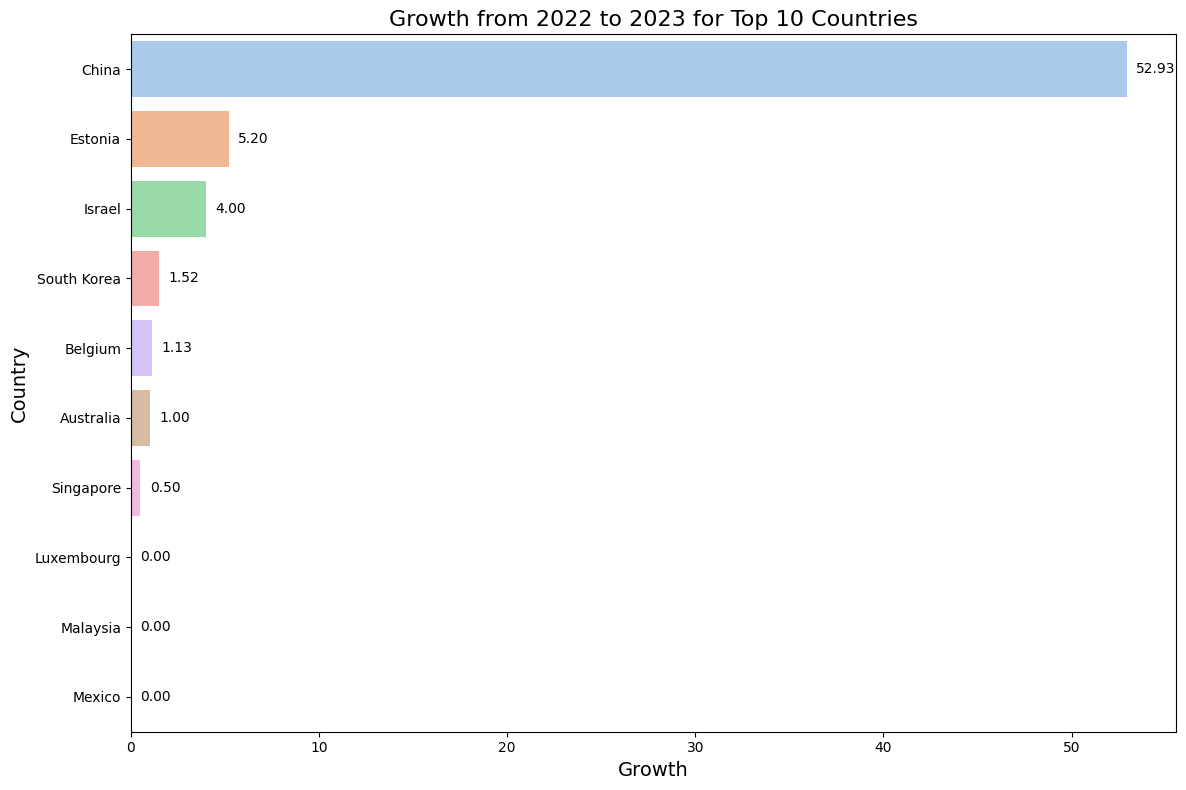

In [46]:
# Calculate growth for each year
new_growth_df['Growth 2022 to 2023'] = new_growth_df['2023 Valuation'] - new_growth_df['2022 Valuation']

# Aggregate growth by country for top 20 countries
country_growth_2022_2023 = new_growth_df.groupby('Country')['Growth 2022 to 2023'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
barplot1 = sns.barplot(x=country_growth_2022_2023.values, y=country_growth_2022_2023.index, palette='pastel')
plt.title('Growth from 2022 to 2023 for Top 10 Countries', fontsize=16)
plt.xlabel('Growth', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with values inside the bars
for index, value in enumerate(country_growth_2022_2023):
    barplot1.text(value + 0.5, index, f'{value:.2f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig("Images/growth_22-23_bar")
plt.show()

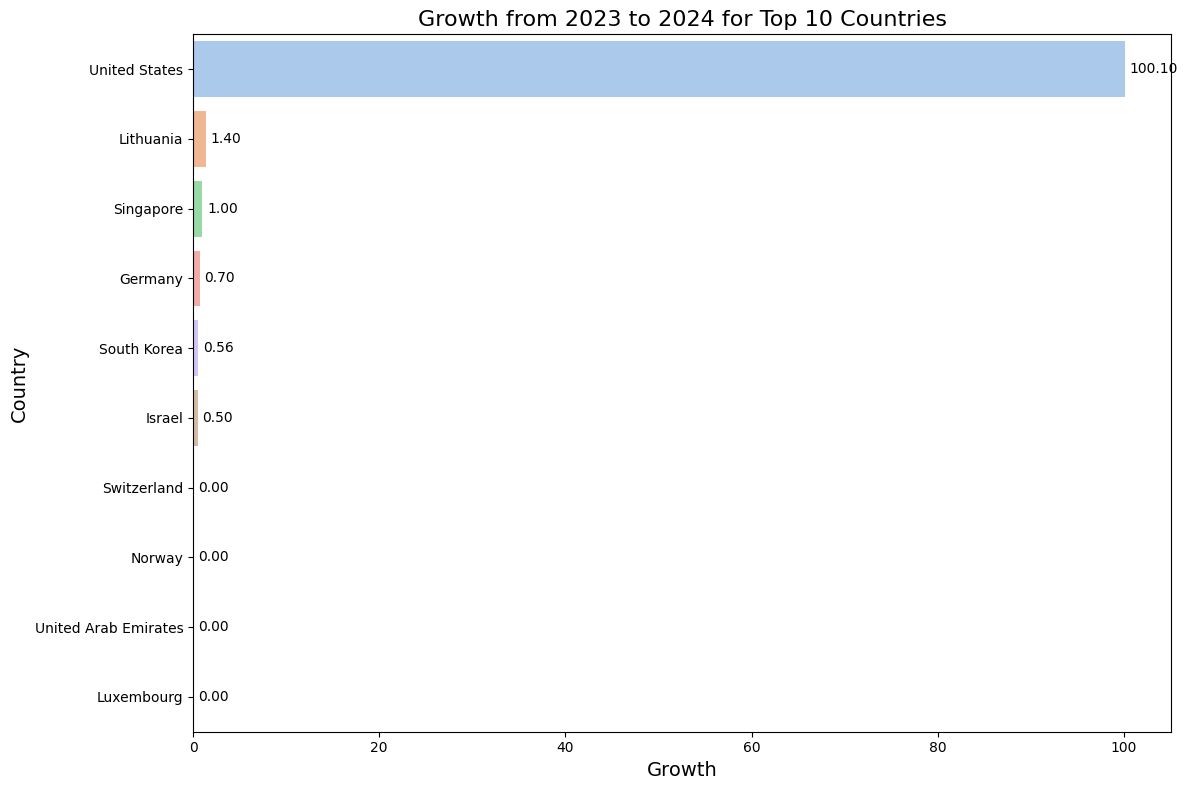

In [47]:
# Calculate growth for each year
new_growth_df['Growth 2023 to 2024'] = new_growth_df['2024 Valuation'] - new_growth_df['2023 Valuation']

# Aggregate growth by country for top 20 countries
country_growth_2023_2024 = new_growth_df.groupby('Country')['Growth 2023 to 2024'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
barplot2 = sns.barplot(x=country_growth_2023_2024.values, y=country_growth_2023_2024.index, palette='pastel')
plt.title('Growth from 2023 to 2024 for Top 10 Countries', fontsize=16)
plt.xlabel('Growth', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with values inside the bars
for index, value in enumerate(country_growth_2023_2024):
    barplot2.text(value + 0.5, index, f'{value:.2f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig("Images/growth_23-24_bar")
plt.show()

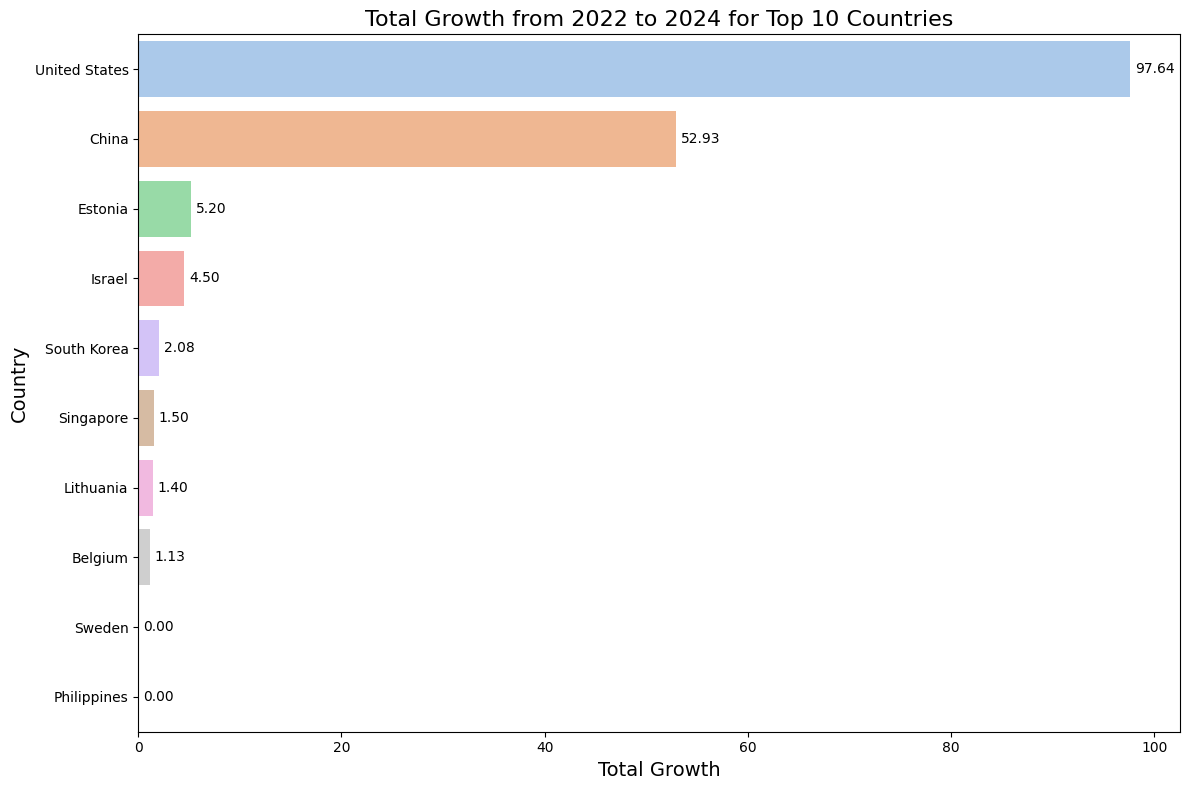

In [48]:
# Calculate total growth from 2022 to 2024
new_growth_df['Total Growth 2022 to 2024'] = new_growth_df['2024 Valuation'] - new_growth_df['2022 Valuation']

# Aggregate total growth by country for top 20 countries
country_total_growth = new_growth_df.groupby('Country')['Total Growth 2022 to 2024'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
barplot_total = sns.barplot(x=country_total_growth.values, y=country_total_growth.index, palette='pastel')

plt.title('Total Growth from 2022 to 2024 for Top 10 Countries', fontsize=16)
plt.xlabel('Total Growth', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with values inside the bars
for index, value in enumerate(country_total_growth):
    barplot_total.text(value + 0.5, index, f'{value:.2f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig("Images/total_growth_Bar")
plt.show()

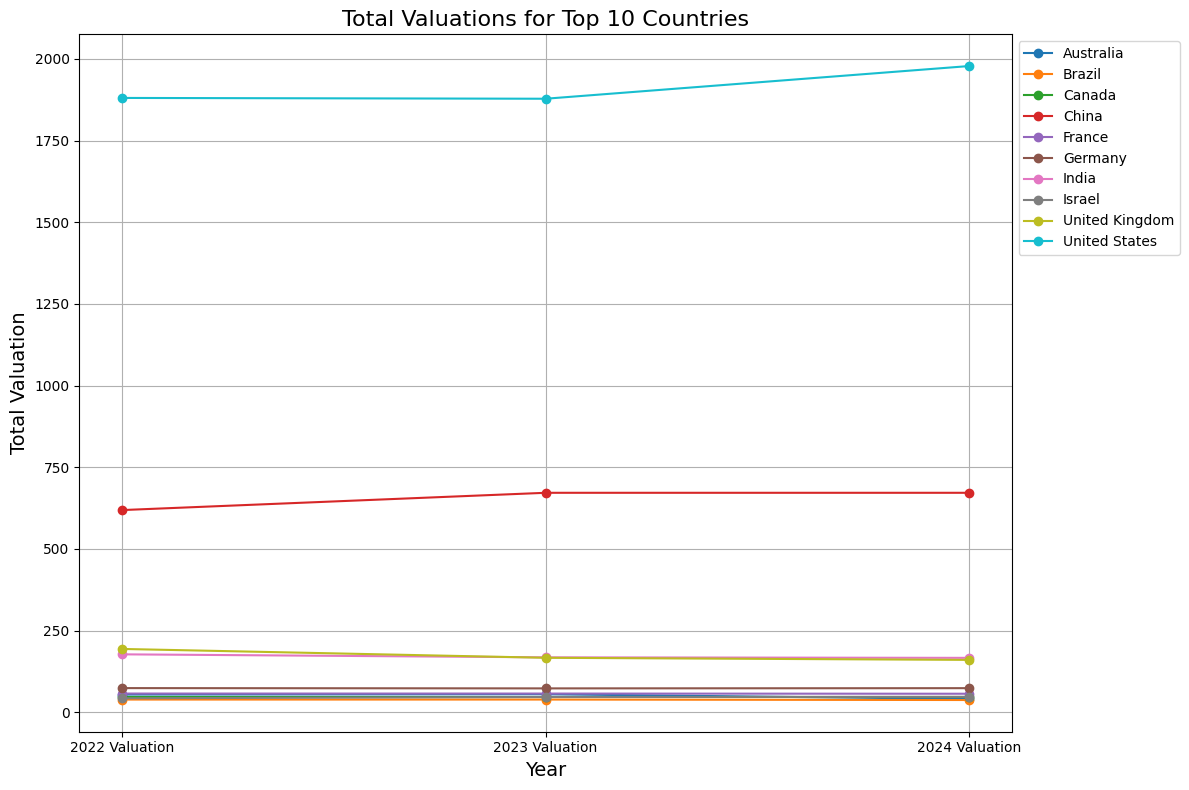

In [49]:
# Example data preparation (replace with your actual data)
# Group by country and aggregate sum of valuations for 2022, 2023, and 2024
country_sum_valuations = new_growth_df.groupby('Country')[['2022 Valuation', '2023 Valuation', '2024 Valuation']].sum()

# Select top 20 countries by sum of valuations
top_20_countries = country_sum_valuations.sum(axis=1).nlargest(10).index

# Filter the original data to include only the top 20 countries
filtered_data = new_growth_df[new_growth_df['Country'].isin(top_20_countries)]

# Group by country and aggregate sum of valuations for the top 20 countries
country_valuations_top_20 = filtered_data.groupby('Country')[['2022 Valuation', '2023 Valuation', '2024 Valuation']].sum()

# Plotting
plt.figure(figsize=(12, 8))

# Plot each country's sum of valuations as a line
for country in country_valuations_top_20.index:
    plt.plot(country_valuations_top_20.columns, country_valuations_top_20.loc[country], marker='o', label=country)

# Customize labels, title, and ticks
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Valuation', fontsize=14)
plt.title('Total Valuations for Top 10 Countries', fontsize=16)
plt.xticks(country_valuations_top_20.columns)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position

plt.grid(True)  # Add grid lines for better readability

plt.tight_layout()
plt.savefig("Images/2022-23-24graph")
plt.show()

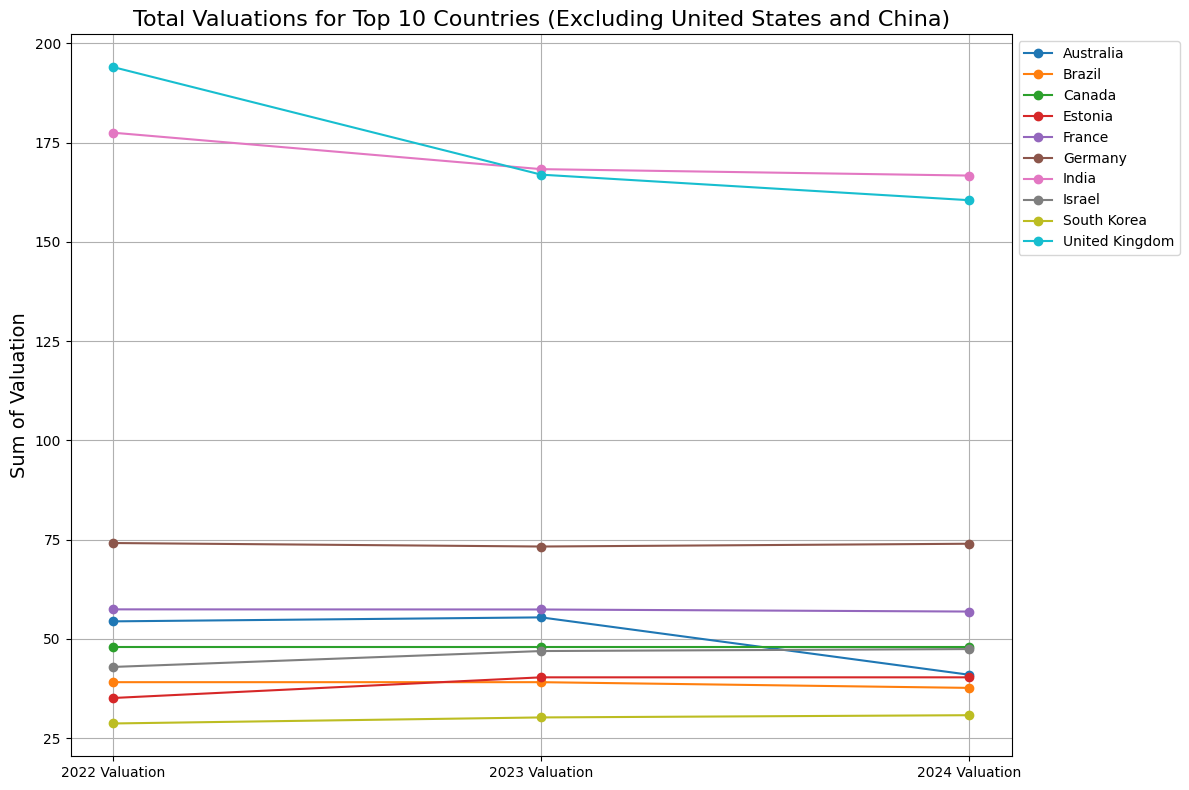

In [50]:
# Step 1: Filter out the United States and China
filtered_df_no_us_china = new_growth_df[(new_growth_df['Country'] != 'United States') & (new_growth_df['Country'] != 'China')]

# Step 2: Group by country and aggregate sum of valuations for 2022, 2023, and 2024
country_sum_valuations_no_us_china = filtered_df_no_us_china.groupby('Country')[['2022 Valuation', '2023 Valuation', '2024 Valuation']].sum()

# Step 3: Select top 10 countries by sum of valuations
top_10_countries_no_us_china = country_sum_valuations_no_us_china.sum(axis=1).nlargest(10).index

# Step 4: Filter the original data to include only the top 10 countries
filtered_data_no_us_china_top_10 = new_growth_df[new_growth_df['Country'].isin(top_10_countries_no_us_china)]

# Step 5: Group by country and aggregate sum of valuations for the top 10 countries
country_valuations_top_10_no_us_china = filtered_data_no_us_china_top_10.groupby('Country')[['2022 Valuation', '2023 Valuation', '2024 Valuation']].sum()

# Plotting
plt.figure(figsize=(12, 8))

# Plot each country's sum of valuations as a line
for country in country_valuations_top_10_no_us_china.index:
    plt.plot(country_valuations_top_10_no_us_china.columns, country_valuations_top_10_no_us_china.loc[country], marker='o', label=country)

# Customize labels, title, and ticks
plt.ylabel('Sum of Valuation', fontsize=14)
plt.title('Total Valuations for Top 10 Countries (Excluding United States and China)', fontsize=16)
plt.xticks(country_valuations_top_10_no_us_china.columns)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position

plt.grid(True)  # Add grid lines for better readability

plt.tight_layout()
plt.savefig("Images/2022-23-24graph_no_us_china.png")
plt.show()

# Country vs Industry

In [25]:
# Create a crosstab to see the frequency of each Industry in each Country
country_industry_crosstab = pd.crosstab(new_growth_df['Country'], new_growth_df['Industry'])

country_industry_crosstab.head()

Industry,"500 Global, Rakuten Ventures, Golden Gate Ventures","Andreessen Horowitz, DST Global, IDG Capital",Artificial Intelligence,Artificial intelligence,Auto & transportation,"B Capital Group, Monk's Hill Ventures, Dynamic Parcel Distribution",Consumer & retail,Cybersecurity,Data management & analytics,"Dragonfly Captial, Qiming Venture Partners, DST Global",...,Other,"Sequoia Capital China, ING, Alibaba Entrepreneurs Fund","Sequoia Capital China, Shunwei Capital Partners, Qualgro","SingTel Innov8, Alpha JWC Ventures, Golden Gate Ventures","Supply chain, logistics, & delivery","Temasek, Guggenheim Investments, Qatar Investment Authority","Tiger Global Management, Tiger Brokers, DCM Ventures",Travel,"Vertex Ventures SE Asia, Global Founders Capital, Visa Ventures","Vision Plus Capital, GSR Ventures, ZhenFund"
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgium,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Bermuda,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


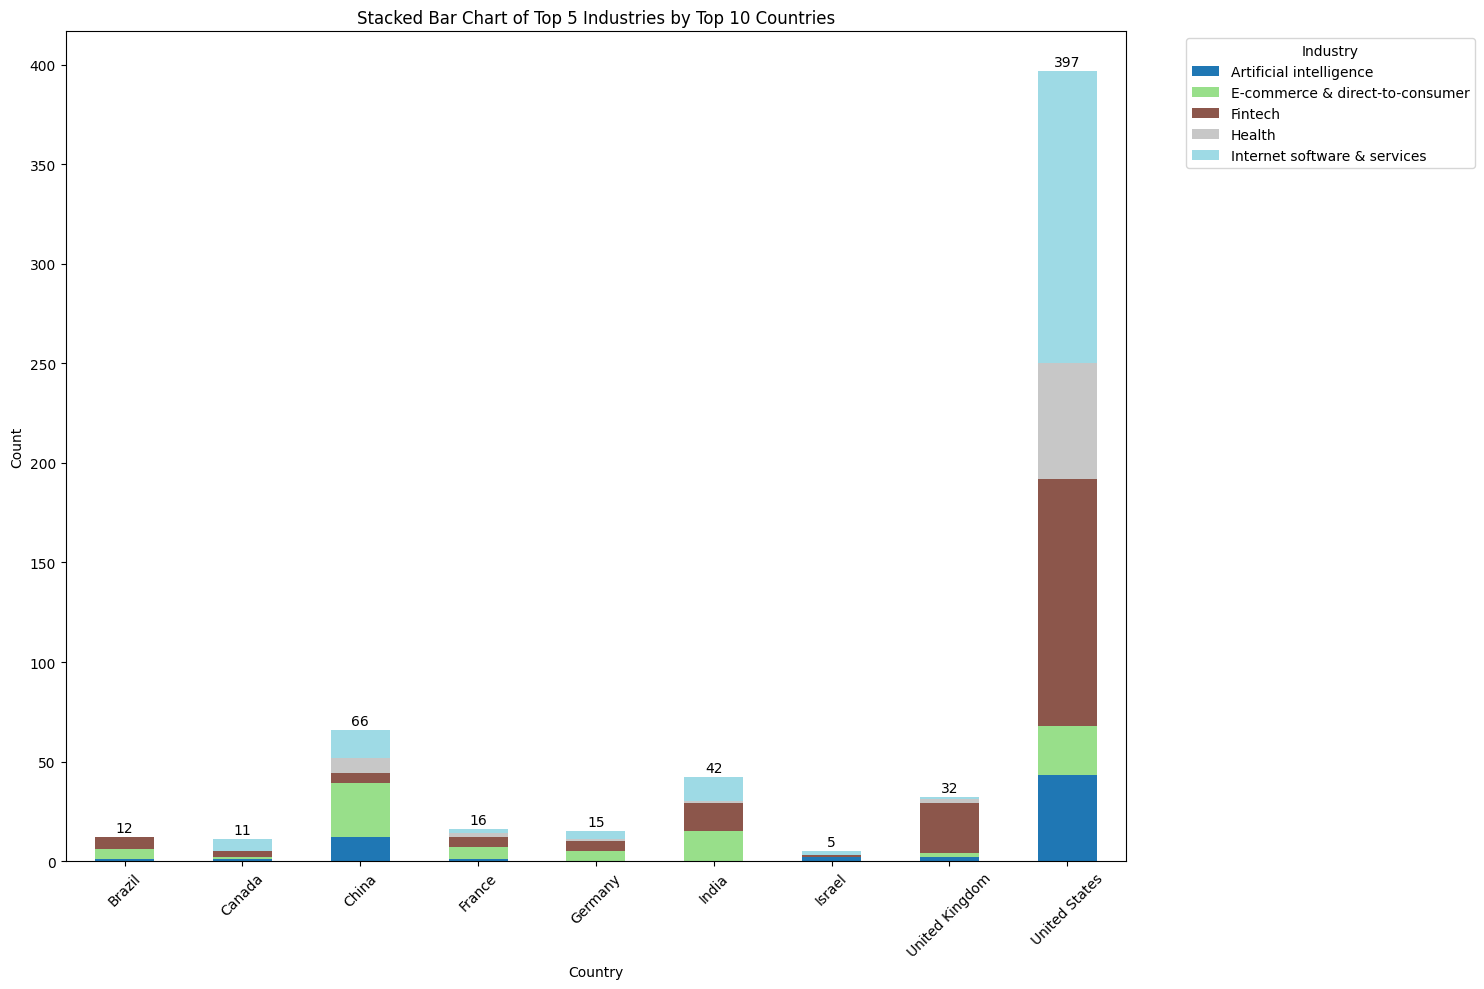

In [51]:
# Step 1: Identify the top 10 countries and top 5 industries
top_countries = new_growth_df['Country'].value_counts().nlargest(10).index
top_industries = new_growth_df['Industry'].value_counts().nlargest(5).index

# Step 2: Filter the dataframe to include only the top countries and industries
filtered_df = new_growth_df[new_growth_df['Country'].isin(top_countries) & new_growth_df['Industry'].isin(top_industries)]

# Step 3: Create a crosstab for the filtered data
filtered_crosstab = pd.crosstab(filtered_df['Country'], filtered_df['Industry'])

# Step 4: Calculate the total count for each country
country_totals = filtered_crosstab.sum(axis=1)

# Step 5: Create a stacked bar chart
ax = filtered_crosstab.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='tab20')

# Adding total count labels above each bar
for i, total in enumerate(country_totals):
    ax.text(i, total + 1, str(total), ha='center', va='bottom', fontsize=10)

# Customize labels, title, and ticks
plt.title('Stacked Bar Chart of Top 5 Industries by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Images/country_industry.png")
plt.show()

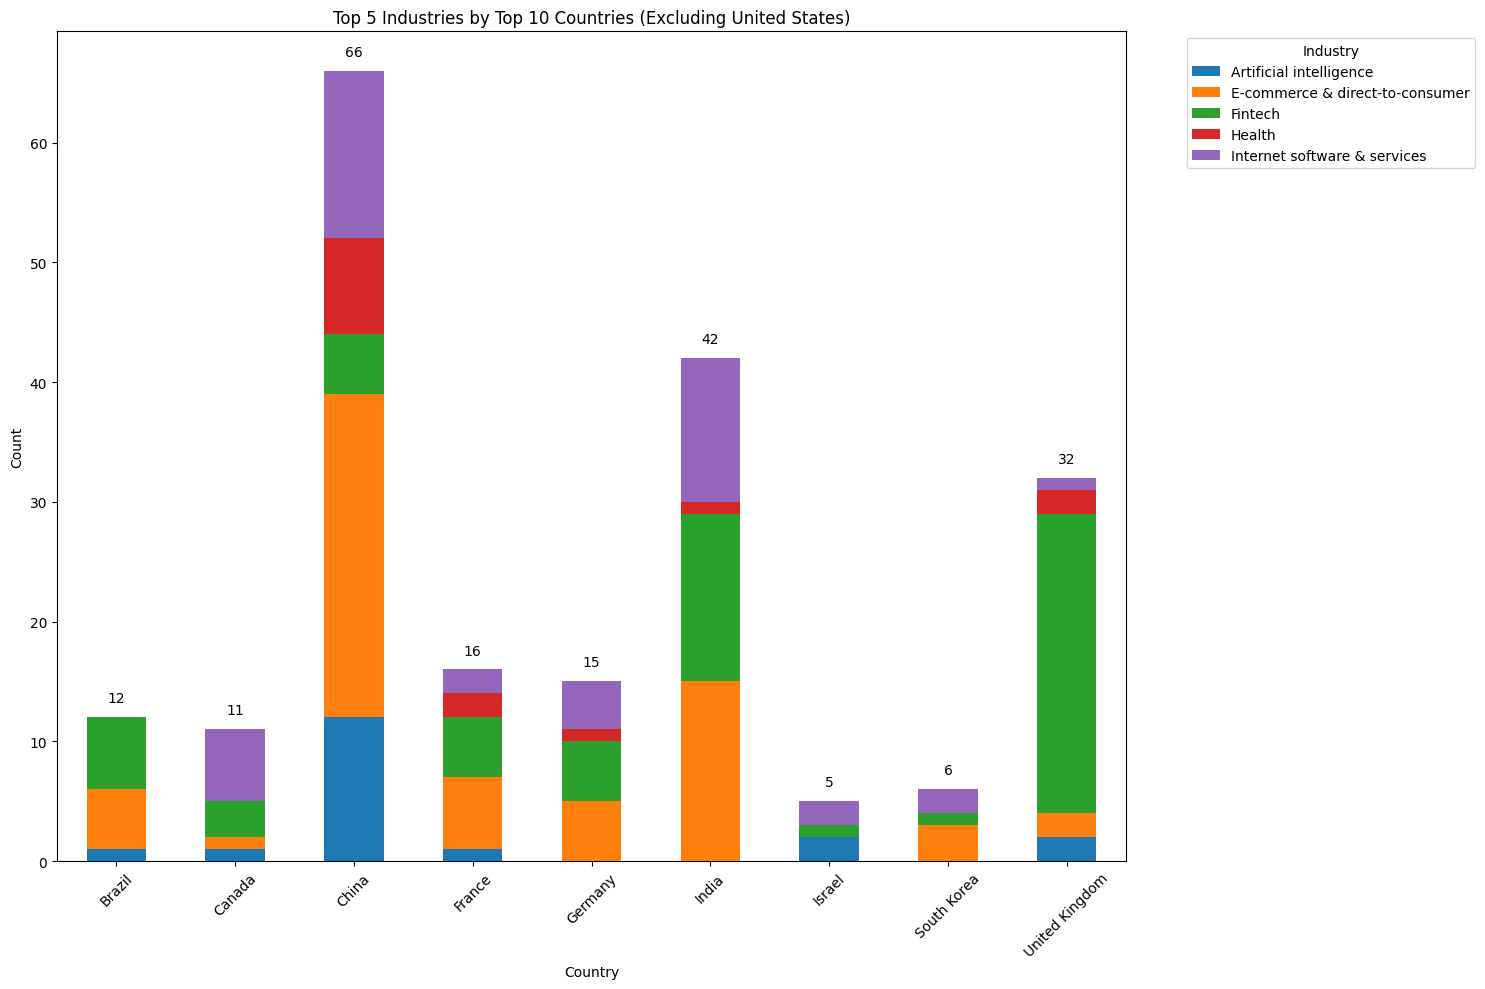

In [52]:
# Step 1: Filter out the United States
filtered_df_no_us = new_growth_df[new_growth_df['Country'] != 'United States']

# Step 2: Identify the top 10 countries (excluding the United States) and top 5 industries
top_countries_no_us = filtered_df_no_us['Country'].value_counts().nlargest(10).index
top_industries = new_growth_df['Industry'].value_counts().nlargest(5).index

# Step 3: Filter the dataframe to include only the top countries and industries
filtered_df_no_us = filtered_df_no_us[filtered_df_no_us['Country'].isin(top_countries_no_us) & filtered_df_no_us['Industry'].isin(top_industries)]

# Step 4: Create a crosstab for the filtered data
filtered_crosstab_no_us = pd.crosstab(filtered_df_no_us['Country'], filtered_df_no_us['Industry'])

# Step 5: Calculate the total count for each country
totals = filtered_crosstab_no_us.sum(axis=1)

ax = filtered_crosstab_no_us.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Top 5 Industries by Top 10 Countries (Excluding United States)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Slant x-axis labels by 45 degrees
plt.tight_layout()

# Add total count labels at the top of each bar
for i, total in enumerate(totals):
    ax.text(i, total + 1, str(total), ha='center', va='bottom')

plt.savefig("Images/country_industry_no_usa")

plt.show()

# Select Investors

In [33]:
unique = clean_df["Select Investors"].nunique()
total_investors = clean_df["Select Investors"].count()

print(unique)
print(f"There are {unique} number of unique select investors.")

print(total_investors)
print(f"There are a total of {total_investors} select investors.")

1152
There are 1152 number of unique select investors.
1189
There are a total of 1189 select investors.


In [34]:
# Split select_investors into separate columns
invest_df = clean_df['Select Investors'].str.split(', ', expand=True)

# Concatenate the new columns with the original DataFrame
new_investor_df = pd.concat([clean_df, invest_df], axis=1)

new_investor_df.head()

,Unnamed: 0,Company,2022 Valuation,2023 Valuation,2024 Valuation,Date Joined,Country,City,Industry,Select Investors,0,1,2,3
0,0,ByteDance,140.0,225.0,225.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,1,SpaceX,127.0,137.0,150.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,2,SHEIN,100.0,66.0,66.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,3,Stripe,95.0,50.0,65.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",Khosla Ventures,LowercaseCapital,capitalG,None
4,4,Canva,40.0,40.0,25.4,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Sequoia Capital China,Blackbird Ventures,Matrix Partners,None


In [35]:
# Split select_investors into separate columns
invest_df = clean_df['Select Investors'].str.split(', ', expand=True)

# Concatenate the new columns with the original DataFrame
new_investor_df = pd.concat([clean_df, invest_df], axis=1)

new_investor_df.head()

,Unnamed: 0,Company,2022 Valuation,2023 Valuation,2024 Valuation,Date Joined,Country,City,Industry,Select Investors,0,1,2,3
0,0,ByteDance,140.0,225.0,225.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,1,SpaceX,127.0,137.0,150.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,2,SHEIN,100.0,66.0,66.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,3,Stripe,95.0,50.0,65.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",Khosla Ventures,LowercaseCapital,capitalG,None
4,4,Canva,40.0,40.0,25.4,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Sequoia Capital China,Blackbird Ventures,Matrix Partners,None


In [38]:
# Make a new DataFrame of just all investors
investors_df = new_investor_df.iloc[:, 10:14]
investors_df.head()

,0,1,2,3
0,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Khosla Ventures,LowercaseCapital,capitalG,None
4,Sequoia Capital China,Blackbird Ventures,Matrix Partners,None


In [39]:
investors_df.count()

0    1189
1    1136
2    1038
3       7
dtype: int64

In [40]:
# Checking for different capilization that may throw off our data (very slight but it did)
investors_df[0] = investors_df[0].str.lower()
investors_df[1] = investors_df[1].str.lower()
investors_df[2] = investors_df[2].str.lower()
investors_df[3] = investors_df[3].str.lower()

In [41]:
# Combine all investor columns into a single Series
investors_series = pd.concat([investors_df[0], investors_df[1], investors_df[2], investors_df[3]], ignore_index=True)

# Find the most common investor
most_frequent_investor = investors_series.value_counts()
print(most_frequent_investor)

most_frequent_investor = investors_series.value_counts().idxmax().title()
print(f"The most frequent investor is: {most_frequent_investor}")

accel                        62
tiger global management      58
andreessen horowitz          58
insight partners             53
sequoia capital              52
                             ..
china renaissance             1
new leaf venture partners     1
gron ventures                 1
webb investment network       1
nirvana venture advisors      1
Name: count, Length: 1348, dtype: int64
The most frequent investor is: Accel


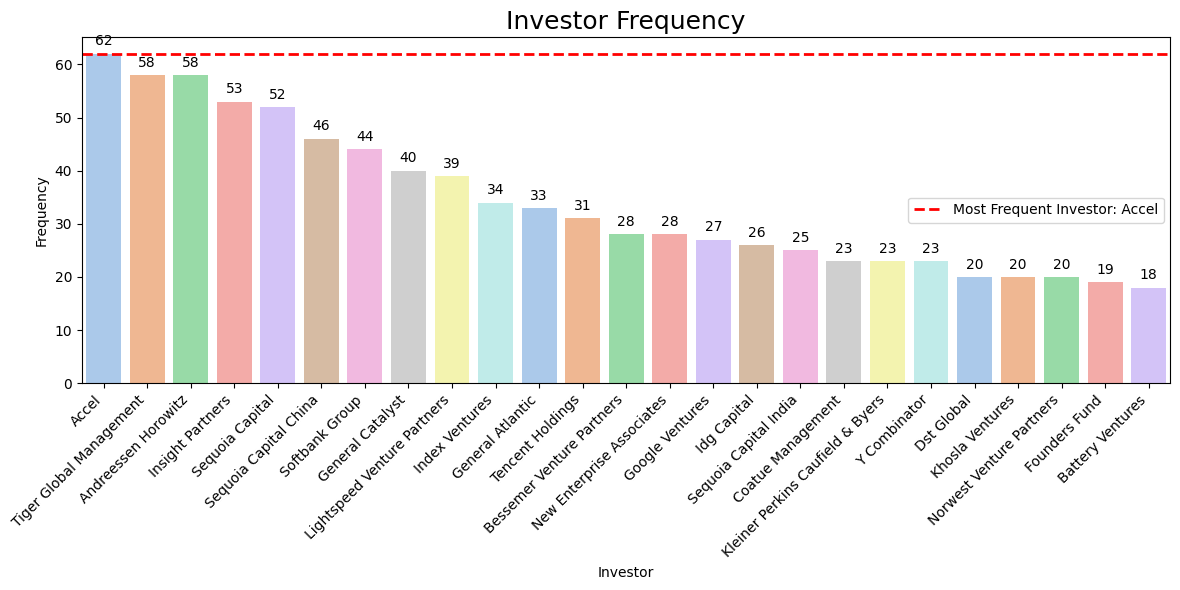

In [42]:
# Convert to string to handle potential None or NaN values
investors_series = investors_series.astype(str)

# Filter out 'None', 'nan', and 'none' values
investors_series = investors_series[~investors_series.isin(['none', 'nan', 'None'])]

# Find the most common investor
most_frequent_investor = investors_series.value_counts().head(25)

# Capitalize each word in index labels and most common investor label
most_frequent_investor.index = most_frequent_investor.index.str.title()

# Plotting
plt.figure(figsize=(12, 6))  # Increase figure width
barplot = sns.barplot(x=most_frequent_investor.index, y=most_frequent_investor.values, palette="pastel")

# Annotate bars with values inside the bars (capitalized)
for index, value in enumerate(most_frequent_investor):
    barplot.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

# Highlighting the most common investor
plt.axhline(y=most_frequent_investor.max(), color='red', linestyle='--', linewidth=2,
            label=f'Most Frequent Investor: {most_frequent_investor.idxmax().title()}')

plt.title('Investor Frequency', fontdict={'fontsize': 18})  # Title font
plt.xlabel('Investor')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and horizontal alignment
plt.legend()
plt.tight_layout()

plt.savefig("Images/investor_frequency.png")
plt.show()